In [1]:
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sn
from random import randrange, uniform
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import pylab
from scipy import stats
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
import warnings
from random import *    
from numpy import *
from scipy.stats import chisquare
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

C:\Users\Deepanshu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Extracting Data
original_data = pd.read_csv('Data_Project_1.csv', encoding = ' iso-8859-1')

In [3]:
original_data = original_data.reset_index(drop=True)
original_data.index += 1

In [4]:
working_data=original_data

In [5]:
df=working_data.drop(['dteday','instant'],axis=1)
working_data=working_data.drop(['dteday'],1)

In [6]:
df_cat=df.copy()
df_num=df.copy()

In [7]:
#Converting variables to categoric and numeric
num_names=['temp','atemp','hum','windspeed','casual','registered','cnt']
cat_names=['yr','season','mnth','holiday','weekday','workingday','weathersit']

df_num_sliced = df_num.loc[:,num_names]
df_cat_sliced = df_num.loc[:,cat_names]

for var in cat_names:
    df_cat[var] = df_cat[var].astype("category")
    df_cat_sliced[var] = df_cat_sliced[var].astype("category")

In [8]:
#Missing value analysis
missing_val = pd.DataFrame(df.isnull().sum())
missing_val

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


[Text(0,0.5,'Users Count'), Text(0.5,0,'Year'), None]

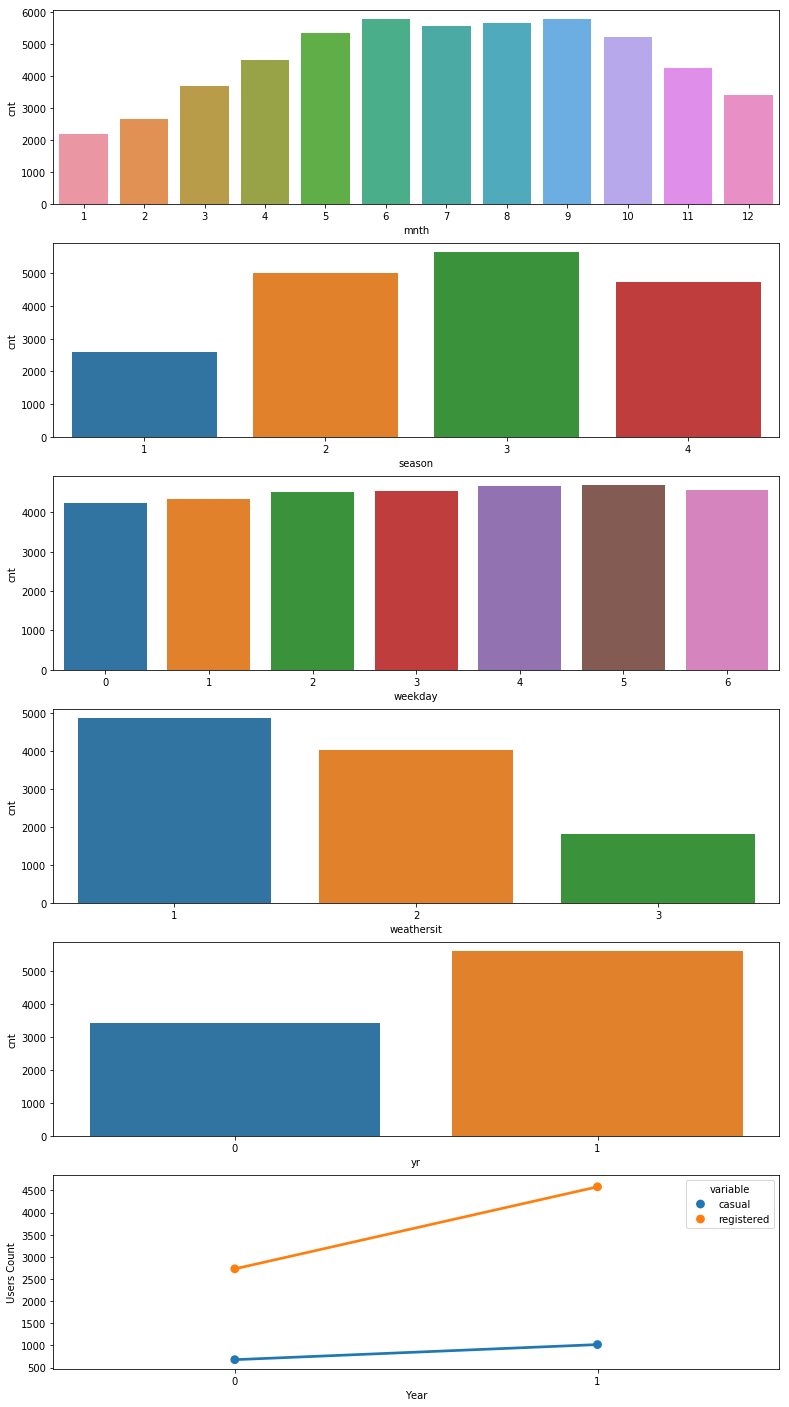

In [9]:
#Visualizing the Raw Data
fig,(ax1,ax2,ax3,ax4, ax5, ax6)= plt.subplots(nrows=6)
fig.set_size_inches(13,25)
cnt_by_mnth = pd.DataFrame(df_cat.groupby("mnth")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_mnth,x="mnth",y="cnt",ax=ax1)

cnt_by_season = pd.DataFrame(df_cat.groupby(["season"])["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_season,x="season",y="cnt",ax=ax2)

cnt_by_weekday = pd.DataFrame(df_cat.groupby("weekday")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_weekday,x="weekday",y="cnt",ax=ax3)

cnt_by_weathersit = pd.DataFrame(df_cat.groupby("weathersit")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_weathersit,x="weathersit",y="cnt",ax=ax4)

cnt_by_yr = pd.DataFrame(df_cat.groupby("yr")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_yr,x="yr",y="cnt",ax=ax5)

transformed = pd.melt(df_cat[["yr","casual","registered"]], id_vars=['yr'], value_vars=['casual', 'registered'])
cnt_by_user= pd.DataFrame(transformed.groupby(["yr","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=cnt_by_user["yr"], y=cnt_by_user["value"],hue=cnt_by_user["variable"],hue_order=["casual","registered"], data=transformed, join=True,ax=ax6)
ax6.set(xlabel='Year', ylabel='Users Count',label='big')

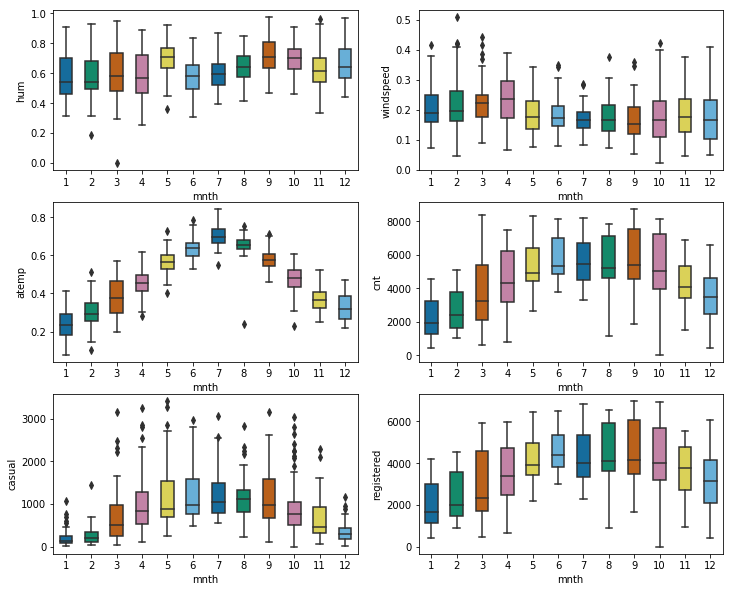

In [10]:
#outlier analysis
#visualizing outliers (boxplot)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,10)
sn.boxplot(y='hum', x='mnth',data=df_cat, width=.5,palette="colorblind",ax=axes[0][0])
sn.boxplot(y='windspeed', x='mnth',data=df_cat, width=0.5,palette="colorblind",ax=axes[0][1])
sn.boxplot(y='atemp', x='mnth',data=df_cat, width=0.5,palette="colorblind",ax=axes[1][0])
sn.boxplot(y='cnt', x='mnth',data=df_cat, width=0.5,palette="colorblind",ax=axes[1][1])
sn.boxplot(y='casual', x='mnth',data=df_cat, width=0.5,palette="colorblind",ax=axes[2][0])
sn.boxplot(y='registered', x='mnth',data=df_cat, width=0.5,palette="colorblind",ax=axes[2][1])

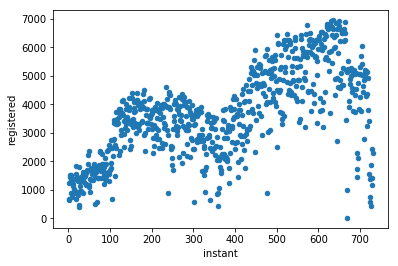

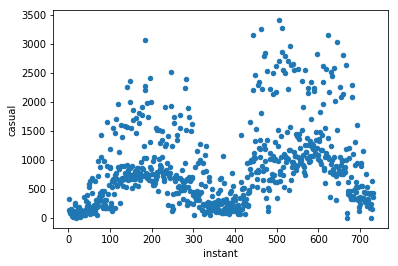

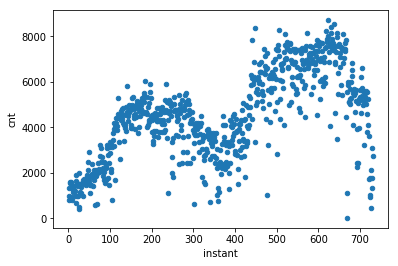

In [11]:
#Visualizing distribution 
ax8 = original_data.plot(kind='scatter',x='instant', y='registered')
ax9 = original_data.plot(kind='scatter',x='instant', y='casual')
ax10 = original_data.plot(kind='scatter',x='instant', y='cnt')

C:\Users\Deepanshu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Deepanshu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Deepanshu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Deepanshu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Deepanshu\Anaconda3\lib\site-packages\matpl

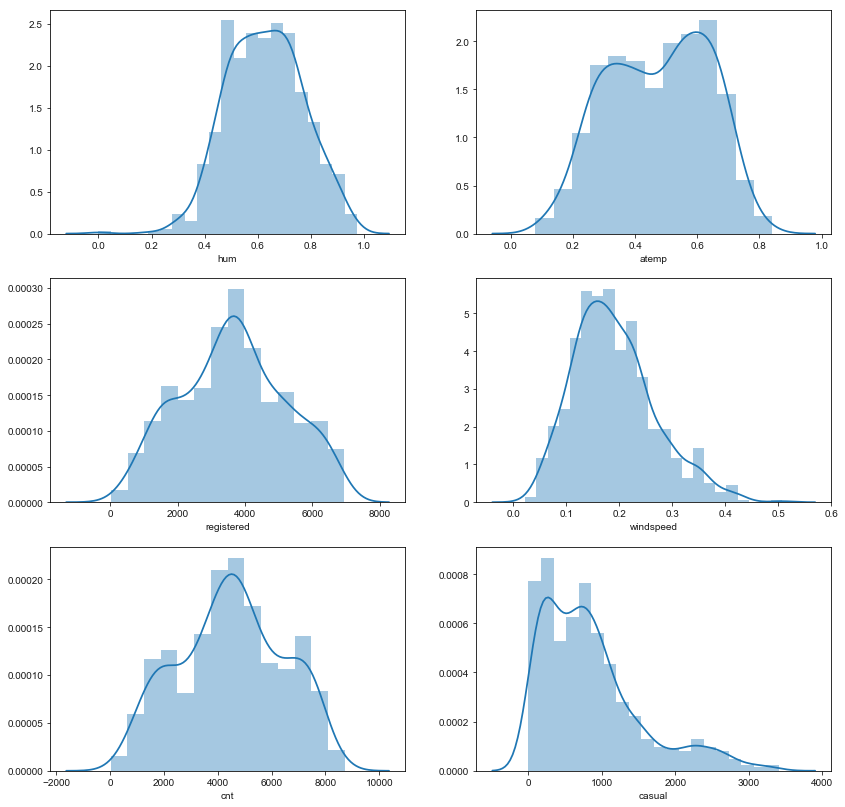

In [12]:
#Histograms before removing outliers
a4_dims = (14, 14)
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=a4_dims)
sn.set(color_codes=True)
sn.set(style="white", palette="muted")
sn.distplot(df_num['hum'], ax=axes[0][0])
sn.distplot(df_num['atemp'], ax=axes[0][1])
sn.distplot(df_num['registered'], ax=axes[1][0])
sn.distplot(df_num['windspeed'], ax=axes[1][1])
sn.distplot(df_num['cnt'], ax=axes[2][0])
sn.distplot(df_num['casual'], ax=axes[2][1])



# Outlier analysis

In [13]:
#Detecting outlier and replacing it with NA

q75_w, q25_w = np.percentile(df['windspeed'], [75 ,25])


iqr_w = q75_w - q25_w


minimum_w = q25_w - (iqr_w*1.5)
maximum_w = q75_w + (iqr_w*1.5)

q75_h, q25_h = np.percentile(df['hum'], [75 ,25])


iqr_h = q75_h - q25_h


minimum_h = q25_h - (iqr_h*1.5)
maximum_h = q75_h + (iqr_h*1.5)

q75_cnt, q25_cnt = np.percentile(df['casual'], [75 ,25])


iqr_cnt = q75_cnt - q25_cnt


minimum_cnt = q25_cnt - (iqr_cnt*1.5)
maximum_cnt = q75_cnt + (iqr_cnt*1.5)

q75_atemp, q25_atemp = np.percentile(df_num['atemp'], [75 ,25])


iqr_atemp = q75_atemp - q25_atemp


minimum_atemp = q25_atemp - (iqr_atemp*1.5)
maximum_atemp = q75_atemp + (iqr_atemp*1.5)


df_cat.loc[df_cat['hum'] < minimum_h, 'hum'] = np.nan
df_cat.loc[df_cat['hum'] > maximum_h, 'hum'] = np.nan
df_num.loc[df_num['hum'] < minimum_h, 'hum'] = np.nan
df_num.loc[df_num['hum'] > maximum_h, 'hum'] = np.nan
df_cat.loc[df_cat['windspeed'] < minimum_w, 'windspeed'] = np.nan
df_cat.loc[df_cat['windspeed'] > maximum_w, 'windspeed'] = np.nan
df_num.loc[df_num['windspeed'] < minimum_w, 'windspeed'] = np.nan
df_num.loc[df_num['windspeed'] > maximum_w, 'windspeed'] = np.nan
df_cat.loc[df_cat['casual'] < minimum_cnt, 'casual'] = np.nan
df_cat.loc[df_cat['casual'] > maximum_cnt, 'casual'] = np.nan
df_num.loc[df_num['casual'] < minimum_cnt, 'casual'] = np.nan
df_num.loc[df_num['casual'] > maximum_cnt, 'casual'] = np.nan
df_cat.loc[df_cat['atemp'] < minimum_atemp, 'atemp'] = np.nan
df_cat.loc[df_cat['atemp'] > maximum_atemp, 'atemp'] = np.nan
df_num.loc[df_num['atemp'] < minimum_atemp, 'atemp'] = np.nan
df_num.loc[df_num['atemp'] > maximum_atemp, 'atemp'] = np.nan

In [14]:
maximum_cnt

2266.75

In [15]:
# #Calculating missing value after outlier analysis
missing_val = pd.DataFrame(df_cat.isnull().sum())
missing_val

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,2


In [16]:
df_cat=df_cat.dropna()
df_num=df_num.dropna()

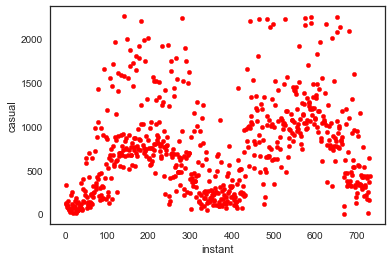

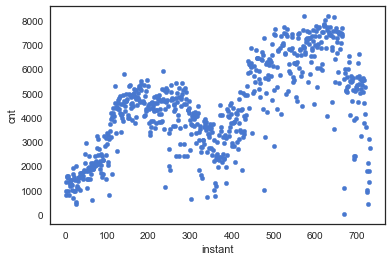

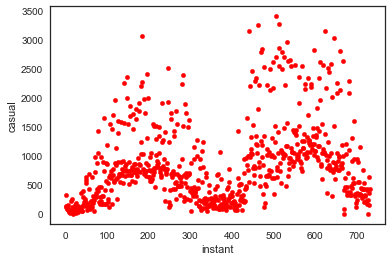

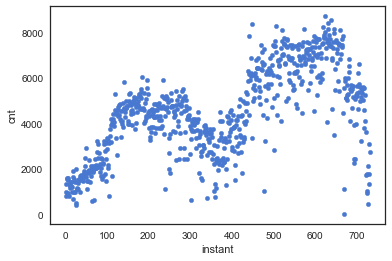

In [17]:
#Comparing before and after outlier analysis scatter plot
df_cat_sc= df_cat
df_cat_sc['instant']= original_data['instant']
ax9_new = df_cat_sc.plot(kind='scatter',x='instant', y='casual', color="red")
ax10_new = df_cat_sc.plot(kind='scatter',x='instant', y='cnt')
ax9 = original_data.plot(kind='scatter',x='instant', y='casual',color="red")
ax10 = original_data.plot(kind='scatter',x='instant', y='cnt')

In [18]:
df_cat=df_cat.drop(['instant'],1) 

In [19]:
#Visualizing the data that has been removed by deleting outliers of variable casual
df.loc[df['casual'] > 2266]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
149,2,0,5,0,0,0,1,0.667500,0.615550,0.818750,0.213938,2355,2433,4788
184,3,0,7,0,0,0,2,0.716667,0.668575,0.682500,0.228858,2282,2367,4649
185,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
197,3,0,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,2418,3505,5923
247,3,0,9,0,0,0,1,0.709167,0.665429,0.742083,0.206467,2521,2419,4940
282,4,0,10,0,0,0,1,0.540833,0.523983,0.727500,0.063450,2397,3114,5511
442,1,1,3,0,6,0,2,0.514167,0.505046,0.755833,0.110704,3155,4681,7836
448,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
456,2,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235
457,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,2347,3694,6041


#### Removal of outliers had only cost major drop to the variable 'weekday'

##### Seeing the effect on weekday before and after outlier play

In [20]:
df_cat.groupby(["yr","weekday"])["cnt"].mean()

yr  weekday
0   0          3274.708333
    1          3452.040816
    2          3500.843137
    3          3253.250000
    4          3394.680000
    5          3500.115385
    6          3376.176471
1   0          4521.948718
    1          5170.215686
    2          5553.288462
    3          5862.000000
    4          5989.431373
    5          5857.060000
    6          4491.925926
Name: cnt, dtype: float64

In [21]:
df.groupby(["yr","weekday"])["cnt"].mean()

yr  weekday
0   0          3405.269231
    1          3465.788462
    2          3468.038462
    3          3253.250000
    4          3356.769231
    5          3500.115385
    6          3391.377358
1   0          5036.849057
    1          5194.000000
    2          5553.288462
    3          5843.826923
    4          5977.750000
    5          5880.461538
    6          5732.000000
Name: cnt, dtype: float64

In [22]:
df_cat['weekday'].value_counts()

2    103
5    102
3    102
4    101
1    100
0     87
6     78
Name: weekday, dtype: int64

In [23]:
df['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64

C:\Users\Deepanshu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Deepanshu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Deepanshu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Deepanshu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Deepanshu\Anaconda3\lib\site-packages\matpl

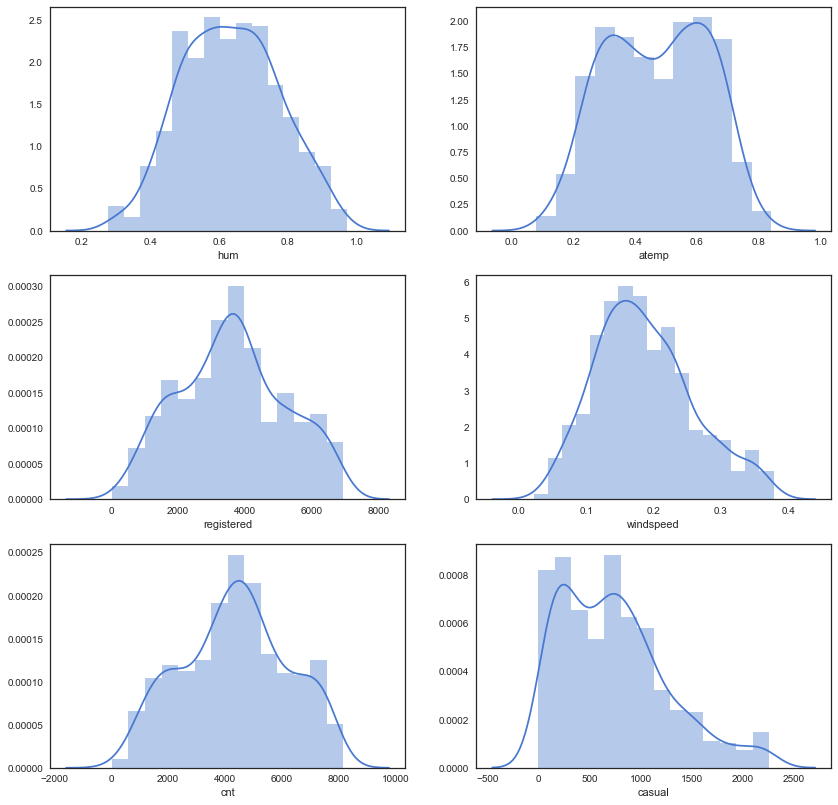

In [24]:
#Histograms after removing outliers
a4_dims = (14, 14)
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=a4_dims)
sn.set(color_codes=True)
sn.set(style="white", palette="muted")
sn.distplot(df_num['hum'], ax=axes[0][0])
sn.distplot(df_num['atemp'], ax=axes[0][1])
sn.distplot(df_num['registered'], ax=axes[1][0])
sn.distplot(df_num['windspeed'], ax=axes[1][1])
sn.distplot(df_num['cnt'], ax=axes[2][0])
sn.distplot(df_num['casual'], ax=axes[2][1])

In [25]:
original_data.groupby(["season"])["mnth"].unique().to_frame()

,mnth
season,
1,"[1, 2, 3, 12]"
2,"[3, 4, 5, 6]"
3,"[6, 7, 8, 9]"
4,"[9, 10, 11, 12]"


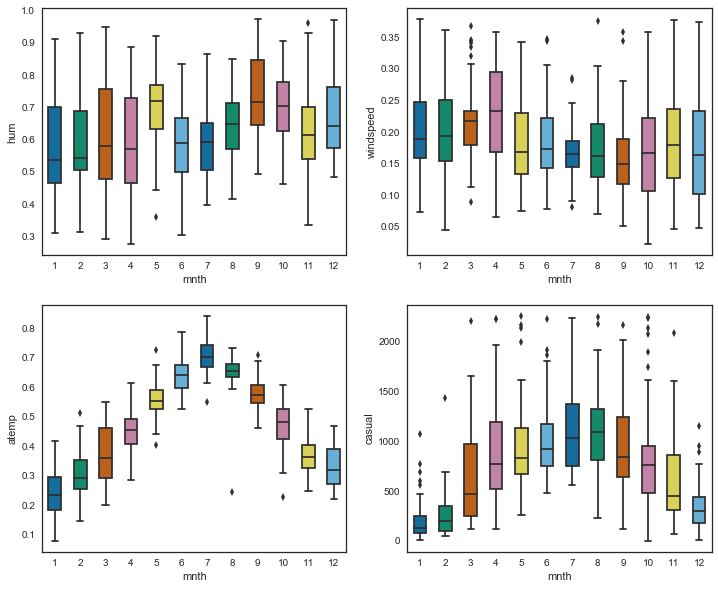

In [26]:
#outlier analysis
#visualizing outliers through boxplot after droppping
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(y='hum', x='mnth',data=df_cat, width=0.5,palette="colorblind",ax=axes[0][0])
sn.boxplot(y='windspeed', x='mnth',data=df_cat, width=0.5,palette="colorblind",ax=axes[0][1])
sn.boxplot(y='atemp', x='mnth',data=df_cat, width=0.5,palette="colorblind",ax=axes[1][0])
sn.boxplot(y='casual', x='mnth',data=df_cat, width=0.5,palette="colorblind",ax=axes[1][1])

In [27]:
df_num_sliced = df_num.iloc[:,7:15]
df_cat_sliced = df_cat.iloc[:,0:7]

In [28]:
df_cat_sliced.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
dtype: object

In [29]:
#for var in cat_names:
 #   df_cat[var] = df_cat[var].astype("category")
  #  df_cat_sliced[var] = df_cat_sliced[var].astype("category")

In [30]:
df_num = df_num.reset_index(drop=True)
df_num.index += 1
df_cat = df_cat.reset_index(drop=True)
df_cat.index += 1
df_num_sliced = df_num_sliced.reset_index(drop=True)
df_num_sliced.index += 1
df_cat_sliced = df_cat_sliced.reset_index(drop=True)
df_cat_sliced.index += 1

In [31]:
# Converting the target continious variable to categorical variable by binning for various tests
bins = [0,1000, 2000,3000, 4000,5000, 6000,7000, 8000,9000]
labels = [1,2,3,4,5,6,7,8,9]
df_cat['cnt_binned'] = pd.cut(df_num['cnt'], bins=bins, labels=labels)
df_num['cnt_binned'] = pd.cut(df_num['cnt'], bins=bins, labels=labels)
df_cat_sliced['cnt_binned'] = pd.cut(df_num['cnt'], bins=bins, labels=labels)

# Feature Selection

In [32]:
#Feature Selection using Correlation, ANOVA, and Chi-Square test

## 1) Correlation

correlations = df_num_sliced.corr()
correlations
correlations.style.background_gradient()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1,0.991483,0.122486,-0.139599,0.595525,0.54512,0.629031
atemp,0.991483,1,0.135356,-0.167087,0.593962,0.54785,0.630906
hum,0.122486,0.135356,1,-0.206719,-0.0963499,-0.113078,-0.122854
windspeed,-0.139599,-0.167087,-0.206719,1,-0.184026,-0.212375,-0.231596
casual,0.595525,0.593962,-0.0963499,-0.184026,1,0.427474,0.64289
registered,0.54512,0.54785,-0.113078,-0.212375,0.427474,1,0.967266
cnt,0.629031,0.630906,-0.122854,-0.231596,0.64289,0.967266,1


In [33]:
## 2) Chi-square test of each variable with other (When dependent variable has been converted to categorical through binning)


factors_paired_bin = [(i,j) for i in df_cat_sliced.columns.values for j in df_cat_sliced.columns.values] 

chi2_bin, p_values_bin =[], []

for f in factors_paired_bin:
    if f[0] != f[1]:
             chitest_bin = chi2_contingency(pd.crosstab(df_cat_sliced[f[0]], df_cat_sliced[f[1]]))   
             chi2_bin.append(chitest_bin[0])
             p_values_bin.append(chitest_bin[1])
            
    else:      
             chi2_bin.append(0)
             p_values_bin.append(0)

chi2_bin = np.array(chi2_bin).reshape((8,8))
chi2_df_bin = pd.DataFrame(chi2_bin, index=df_cat_sliced.columns.values, columns=df_cat_sliced.columns.values)
p_values_bin = np.array(p_values_bin).reshape((8,8)) # shaping it as a matrix
p_values_bin = pd.DataFrame(p_values_bin, index=df_cat_sliced.columns.values, columns=df_cat_sliced.columns.values)
p_values_bin

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt_binned
season,0.000000e+00,8.610613e-01,0.000000e+00,2.912027e-01,9.998448e-01,1.470297e-01,6.188767e-03,5.925856e-54
yr,8.610613e-01,0.000000e+00,9.996196e-01,9.775989e-01,3.347478e-01,4.579463e-02,2.789441e-01,7.929200e-53
mnth,0.000000e+00,9.996196e-01,0.000000e+00,3.400998e-01,1.000000e+00,6.921360e-01,2.920914e-03,2.147749e-56
holiday,2.912027e-01,9.775989e-01,3.400998e-01,0.000000e+00,5.084896e-09,1.299889e-11,5.867430e-01,1.901768e-01
weekday,9.998448e-01,3.347478e-01,1.000000e+00,5.084896e-09,0.000000e+00,1.973051e-124,2.941414e-01,1.716889e-04
workingday,1.470297e-01,4.579463e-02,6.921360e-01,1.299889e-11,1.973051e-124,0.000000e+00,6.134247e-01,5.480604e-06
weathersit,6.188767e-03,2.789441e-01,2.920914e-03,5.867430e-01,2.941414e-01,6.134247e-01,0.000000e+00,3.533763e-17
cnt_binned,5.925856e-54,7.929200e-53,2.147749e-56,1.901768e-01,1.716889e-04,5.480604e-06,3.533763e-17,0.000000e+00


In [34]:
#ANOVA Analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols


cw_lm=ols('cnt ~ C(yr)+C(holiday)+C(workingday)+ C(mnth)+C(weekday)+ C(weathersit)+C(season)', data=df_cat).fit() 
print(sm.stats.anova_lm(cw_lm, typ=2))

                     sum_sq     df            F         PR(>F)
C(yr)          6.822035e+08    1.0  1070.317679  2.372238e-139
C(holiday)     1.086908e+06    1.0     1.705263   1.920645e-01
C(workingday)  2.932195e+07    1.0    46.003572   2.663354e-11
C(mnth)        1.461236e+08   11.0    20.841382   2.328851e-36
C(weekday)     8.026674e+06    6.0     2.098858   5.149788e-02
C(weathersit)  1.789559e+08    2.0   140.383120   2.231628e-51
C(season)      5.509763e+07    3.0    28.814454   1.691807e-17
Residual       4.130249e+08  648.0          NaN            NaN


In [35]:
#Checking the amount of data for category holiday
df_cat['holiday'].value_counts()

0    655
1     18
Name: holiday, dtype: int64

In [36]:
#checking the importance of variable holiday
df_cat.groupby(["yr","holiday"])["cnt"].mean()

yr  holiday
0   0          3412.773256
    1          2664.333333
1   0          5487.257235
    1          3885.222222
Name: cnt, dtype: float64

[Text(0,0.5,'Users Count'), Text(0.5,0,'Year'), None]

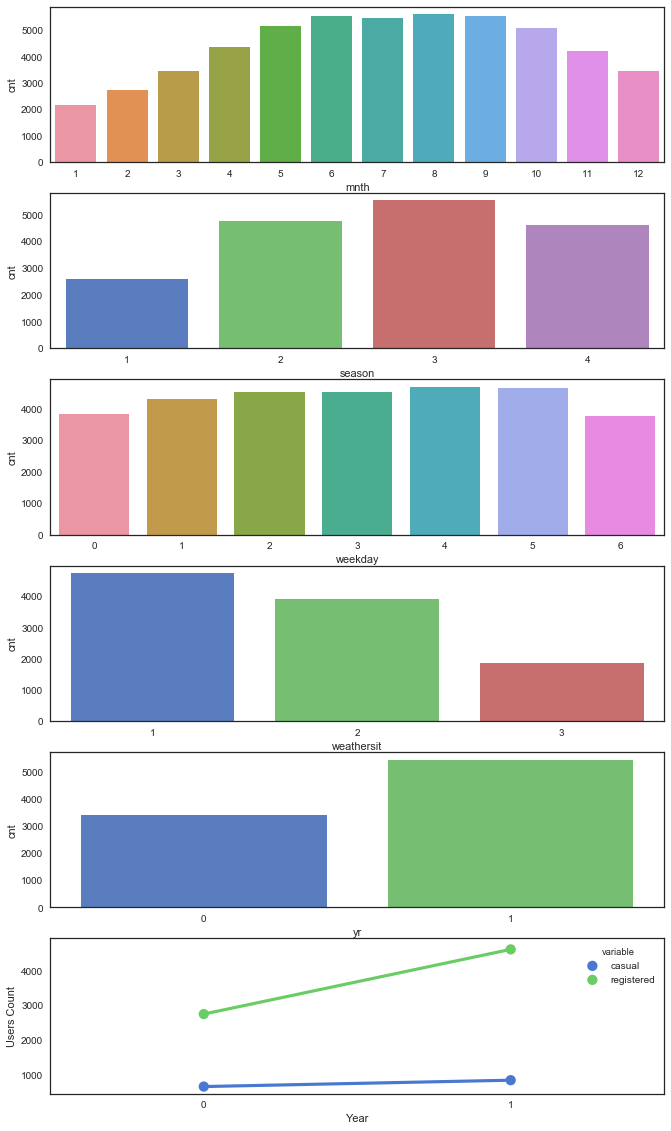

In [37]:
# Visualization of data through bar graphs after removing outliers
fig,(ax1,ax2,ax3,ax4, ax5, ax6)= plt.subplots(nrows=6)
fig.set_size_inches(11,20)
cnt_by_mnth = pd.DataFrame(df_cat.groupby("mnth")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_mnth,x="mnth",y="cnt",ax=ax1)

cnt_by_season = pd.DataFrame(df_cat.groupby("season")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_season,x="season",y="cnt",ax=ax2)

cnt_by_weekday = pd.DataFrame(df_cat.groupby("weekday")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_weekday,x="weekday",y="cnt",ax=ax3)

cnt_by_weathersit = pd.DataFrame(df_cat.groupby("weathersit")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_weathersit,x="weathersit",y="cnt",ax=ax4)

cnt_by_yr = pd.DataFrame(df_cat.groupby("yr")["cnt"].mean()).reset_index()
sn.barplot(data=cnt_by_yr,x="yr",y="cnt",ax=ax5)

transformed = pd.melt(df_cat[["yr","casual","registered"]], id_vars=['yr'], value_vars=['casual', 'registered'])
cnt_by_user= pd.DataFrame(transformed.groupby(["yr","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=cnt_by_user["yr"], y=cnt_by_user["value"],hue=cnt_by_user["variable"],hue_order=["casual","registered"], data=transformed, join=True,ax=ax6)
ax6.set(xlabel='Year', ylabel='Users Count',label='big')

In [38]:
#mnth_names = ["January","February","March","April","May","June","July","August","September","October","November","December"]
#weekday_names = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
#season_names = ["Spring","Summer","fall", "winter"]
#weather_types = ["lev_a","lev_b","lev_c"]

In [39]:
#Dropping unnecessary variables according to the model

drop_features_for_lm=["casual","registered","temp"]
drop_features_for_dt_classification_after_chi=["casual","registered","temp"]
drop_features_for_rf_classification_after_chi=["casual","registered","temp"]

# Model development

In [40]:
#Splitting data into train and test
random.seed(20)
train_num, test_num = train_test_split(df_cat, test_size=0.2)
train_num.dtypes

season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual         float64
registered       int64
cnt              int64
cnt_binned    category
dtype: object

In [41]:
#df5tr['yr'] = df5tr['yr'].astype('category')
#df5tr['holiday'] = df5tr['holiday'].astype('category')
#df5tr['workingday'] = df5tr['workingday'].astype('category')
#df5te['yr'] = df5te['yr'].astype('category')
#df5te['holiday'] = df5te['holiday'].astype('category')
#df5te['workingday'] = df5te['workingday'].astype('category')


In [42]:
train_num = train_num.drop(['casual','registered','temp'], axis=1)
test_num = test_num.drop(['casual','registered','temp'], axis=1)

## Decision Tree

In [43]:
# 1) Decision tree regressor
                 
                 #a)Creating no bins for  categorical variables, and keeping numerical and other variables as it is
        
fit_dt = DecisionTreeRegressor(max_depth=10).fit(train_num.iloc[:,0:10], train_num.iloc[:,10])

In [44]:
predictions_dt = fit_dt.predict(test_num.iloc[:,0:10])

In [45]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    
    return mape

MAPE(test_num.iloc[:,10], predictions_dt)

165.4873531425933

### Checking the reason for high MAPE

In [46]:
dataset = pd.DataFrame({'pred':predictions_dt})

In [47]:
col_1 = dataset
col_1

,pred
0,1820.500000
1,3910.000000
2,1817.000000
3,3513.666667
4,5330.000000
5,4032.000000
6,4454.166667
7,4080.000000
8,5330.000000
9,2028.600000


In [48]:
col_2=test_num.iloc[:,10].to_frame()
col2=col_2.reset_index().drop('index',1)

In [49]:
col_2=col_2.reset_index()

In [50]:
col_2=col_2.drop('index',1)

In [51]:
col_2

,cnt
0,1248
1,4220
2,2594
3,2935
4,5629
5,4098
6,4602
7,4205
8,4862
9,1471


In [52]:
new_col= pd.DataFrame(columns=['subt'])


In [53]:
new_col['subt']= (col_2['cnt']-col_1['pred'])/(col_2['cnt'])

In [54]:
#Values of absolute percentage error
new_col = new_col.sort_values('subt', ascending = True)
new_col

,subt
24,-197.136364
36,-2.712734
96,-1.643478
86,-1.365867
58,-1.198845
68,-0.983770
12,-0.793528
33,-0.753480
102,-0.749088
107,-0.662376


In [55]:
minimum_cnt

-855.25

In [56]:

df_num.loc[df_num['casual'] > 2200]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_binned
136,2,0,5,0,6,0,1,0.602500,0.571975,0.626667,0.120650,2258.0,3547,5805,6
177,3,0,7,0,6,0,1,0.738333,0.667308,0.444583,0.115062,2204.0,2915,5119,6
271,4,0,10,0,6,0,1,0.521667,0.513242,0.701250,0.045404,2235.0,3174,5409,6
425,1,1,3,0,0,0,2,0.472500,0.464000,0.810000,0.126883,2207.0,3685,5892,6
441,2,1,4,0,0,0,1,0.500000,0.492425,0.275833,0.232596,2230.0,2939,5169,6
459,2,1,4,0,0,0,1,0.458333,0.450121,0.587083,0.116908,2229.0,4075,6304,7
491,2,1,6,0,0,0,1,0.726667,0.663517,0.538333,0.133721,2224.0,4374,6598,7
532,3,1,7,0,6,0,1,0.755833,0.697604,0.613333,0.157350,2234.0,4451,6685,7
545,3,1,8,0,6,0,2,0.692500,0.638267,0.732917,0.206479,2247.0,4052,6299,7
599,4,1,10,0,6,0,1,0.393333,0.391396,0.494583,0.146142,2252.0,4857,7109,8


In [57]:
df_num= df_num.sort_values('cnt', ascending = True)
df_num

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_binned
612,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2.0,20,22,1
27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15.0,416,431,1
668,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9.0,432,441,1
26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34.0,472,506,1
63,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114.0,491,605,1
290,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57.0,570,627,1
18,1,0,1,0,2,1,2,0.216667,0.232333,0.861667,0.146775,9.0,674,683,1
329,4,0,12,0,3,1,3,0.410000,0.400246,0.970417,0.266175,50.0,655,705,1
347,1,0,12,0,0,0,1,0.274783,0.279961,0.681304,0.155091,303.0,451,754,1
101,2,0,4,0,6,0,3,0.430833,0.425492,0.888333,0.340808,121.0,674,795,1


In [58]:
#Looking for the unnatural data 
df_cat.loc[df_cat['casual'] == 2]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_binned
612,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2.0,20,22,1


In [59]:
#Removing the row from dataset
df_num=df_num[df_num.casual != 2]
df_cat=df_cat[df_cat.casual != 2]


train_num=train_num[train_num.cnt!=22]

test_num=test_num[test_num.cnt!=22]

# Remodelling

## Decision Tree

In [60]:
# 1) Decision tree regressor
                 
                 #a)Creating no bins for  categorical variables, and keeping numerical and other variables as it is
        
fit_dt = DecisionTreeRegressor(max_depth=10).fit(train_num.iloc[:,0:10], train_num.iloc[:,10])

In [61]:
predictions_dt = fit_dt.predict(test_num.iloc[:,0:10])

In [62]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    
    return mape

MAPE(test_num.iloc[:,10], predictions_dt)

19.306919827474722

In [63]:
#Creating dot file to visualise tree  #http://webgraphviz.com/

#dotfile = open("pro.dot", 'w')
#dt_export = tree.export_graphviz(fit_dt, out_file=dotfile, feature_names = train_num_vis.columns)

NameError: name 'tree' is not defined

## Linear Regression

In [64]:
#REGRESSION MODELS

# 2) Linear regression: 

    #a)Creating dummies for each categorical variable, and keeping numerical variable as it is
    
weathersit_dummy = pd.get_dummies(df_num.weathersit) 
season_dummy = pd.get_dummies(df_num.season) 
mnth_dummy = pd.get_dummies(df_num.mnth) 
weekday_dummy = pd.get_dummies(df_num.weekday)


In [65]:
mnth_dummy.columns=['mnth_1','mnth_2','mnth_3','mnth_4','mnth_5','mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12']
weekday_dummy.columns=['weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','weekday_7']
season_dummy.columns=['season_1','season_2','season_3','season_4']
weathersit_dummy.columns=['weathersit_1','weathersit_1','weathersit_3']


df2tr = pd.merge(train_num, season_dummy ,left_index=True, right_index=True)
df3tr = pd.merge(df2tr, weathersit_dummy ,left_index=True, right_index=True)
df4tr = pd.merge(df3tr, weekday_dummy ,left_index=True, right_index=True)
df5tr = pd.merge(df4tr, mnth_dummy ,left_index=True, right_index=True)

df2te = pd.merge(test_num, season_dummy ,left_index=True, right_index=True)
df3te = pd.merge(df2te, weathersit_dummy ,left_index=True, right_index=True)
df4te = pd.merge(df3te, weekday_dummy ,left_index=True, right_index=True)
df5te = pd.merge(df4te, mnth_dummy ,left_index=True, right_index=True)




In [66]:
df5tr = df5tr.drop(['season','mnth','weekday','weathersit','casual','registered','temp'], axis=1)
df5te = df5te.drop(['season','mnth','weekday','weathersit','casual','registered','temp'], axis=1)
df5tr=df5tr[df5tr.cnt != 22]
df5te=df5te[df5te.cnt != 22]

In [67]:
df5tr['count']=df5tr['cnt']
df5tr['cnt_bin_temp']=df5tr['cnt_binned']
df5tr=df5tr.drop(['cnt','cnt_binned'],1)
df5te['count']=df5te['cnt']
df5te['cnt_bin_temp']=df5te['cnt_binned']
df5te=df5te.drop(['cnt','cnt_binned'],1)

In [68]:
df5tr = df5tr.rename(columns={'count': 'cnt', 'cnt_bin_temp': 'cnt_binned'})
df5te = df5te.rename(columns={'count': 'cnt', 'cnt_bin_temp': 'cnt_binned'})

In [69]:
df5tr=df5tr.astype('float')
df5te=df5te.astype('float')


In [70]:
model_lr_dummies = sm.OLS(df5tr.iloc[:,32], df5tr.iloc[:,0:32].astype('float')).fit()

In [71]:
model_lr_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     119.2
Date:                Wed, 10 Oct 2018   Prob (F-statistic):          7.49e-201
Time:                        02:33:35   Log-Likelihood:                -4272.3
No. Observations:                 538   AIC:                             8601.
Df Residuals:                     510   BIC:                             8721.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr            2004.6720     62.351     32.152      0.000    1882.176    2127.168
holiday       -213.2292    189.906     -1.123      0.262    -586.323     159.864
workingday     943.5755     93.582     10.083      0.000     759.723    1127.428
atemp         4197.7130    475.509      8.828      0.000    3263.515    5131.911
hum          -1534.6142    323.096     -4.750      0.000   -2169.377    -899.851
windspeed    -2689.7185    460.848     -5.836      0.000   -3595.112   -1784.325
season_1      -198.7632    146.567     -1.356      0.176    -486.713      89.187
season_2       498.6622    148.083      3.367      0.001     207.734     789.591
season_3       683.3995    157.210      4.347      0.000     374.541     992.258
season_4      1261.5423    155.665      8.104      0.000     955.719    1567.366
weathersit_1  1428.4283    102.361     13.955      0.000    1227.328    1629.528
weathersit_1   950.1306    123.761      7.677      0.000     706.986    1193.275
weathersit_3  -133.7180    210.791     -0.634      0.526    -547.843     280.407
weekday_1      614.4462    124.977      4.916      0.000     368.913     859.979
weekday_2       45.9024     78.064      0.588      0.557    -107.464     199.269
weekday_3      107.4885     82.633      1.301      0.194     -54.854     269.831
weekday_4      147.9990     82.664      1.790      0.074     -14.404     310.402
weekday_5      218.9174     77.356      2.830      0.005      66.943     370.892
weekday_6      210.0391     79.409      2.645      0.008      54.031     366.047
weekday_7      900.0483    120.567      7.465      0.000     663.178    1136.918
mnth_1        -373.5645    179.304     -2.083      0.038    -725.830     -21.299
mnth_2        -137.9095    167.828     -0.822      0.412    -467.628     191.809
mnth_3         272.7165    132.437      2.059      0.040      12.528     532.905
mnth_4         480.8442    167.034      2.879      0.004     152.685     809.003
mnth_5         808.5060    180.422      4.481      0.000     454.044    1162.968
mnth_6         543.8036    169.708      3.204      0.001     210.390     877.217
mnth_7        -254.2253    198.776     -1.279      0.201    -644.747     136.296
mnth_8         394.9141    185.587      2.128      0.034      30.304     759.524
mnth_9         814.3753    148.475      5.485      0.000     522.678    1106.073
mnth_10        370.1985    162.161      2.283      0.023      51.612     688.785
mnth_11       -387.3774    177.395     -2.184      0.029    -735.893     -38.862
mnth_12       -287.4407    146.617     -1.960      0.050    -575.488       0.607
==============================================================================
Omnibus:                      114.790   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.743
Skew:      

In [72]:
predictions_lr_dummies = model_lr_dummies.predict(df5te.iloc[:,0:32])

In [73]:
def MAPE(y_true, y_pred): 
    mape_lr_dummies = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape_lr_dummies
#Calculate MAPE
MAPE(df5te.iloc[:,32], predictions_lr_dummies)

22.24168168050065

In [74]:
# 2) Linear regression: 

    #b)Creating dummies for only ordinal variable, and keeping numerical and other variables as it is

In [75]:
weathersit_dummy = pd.get_dummies(df_num.weathersit)
weathersit_dummy.columns=['weathersit_1','weathersit_2','weathersit_3']
df5tror = pd.merge(train_num, weathersit_dummy ,left_index=True, right_index=True)
df5tror=df5tror.drop(['cnt','cnt_binned','weathersit'], 1)
df5tror['cnt']=df5tr['cnt']
df5tror['cnt_binned']=df5tr['cnt_binned']

In [76]:
df5teor = pd.merge(test_num, weathersit_dummy ,left_index=True, right_index=True)
df5teor=df5teor.drop(['cnt','cnt_binned','weathersit'], 1)
df5teor['cnt']=df5te['cnt']
df5teor['cnt_binned']=df5te['cnt_binned']

In [77]:
#df5tr['yr'] = df5tr['yr'].astype('category')
#df5tr['holiday'] = df5tr['holiday'].astype('category')
#df5tr['workingday'] = df5tr['workingday'].astype('category')
#df5te['yr'] = df5te['yr'].astype('category')
#df5te['holiday'] = df5te['holiday'].astype('category')
#df5te['workingday'] = df5te['workingday'].astype('category')

In [78]:
model_lr_or_dummies = sm.OLS(df5tror.iloc[:,12], df5tror.iloc[:,0:12].astype(float)).fit()

In [79]:
model_lr_or_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 10 Oct 2018   Prob (F-statistic):          3.08e-182
Time:                        02:33:40   Log-Likelihood:                -4359.3
No. Observations:                 538   AIC:                             8743.
Df Residuals:                     526   BIC:                             8794.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
season         468.3998     60.697      7.717      0.000     349.162     587.637
yr            1918.9567     70.915     27.060      0.000    1779.646    2058.268
mnth           -20.9653     18.882     -1.110      0.267     -58.059      16.128
holiday       -774.3626    267.010     -2.900      0.004   -1298.899    -249.826
weekday         38.8165     18.224      2.130      0.034       3.016      74.618
workingday     388.1183     81.952      4.736      0.000     227.126     549.111
atemp         5496.6418    239.051     22.994      0.000    5027.029    5966.255
hum          -1080.2432    352.136     -3.068      0.002   -1772.009    -388.478
windspeed    -2215.1273    523.306     -4.233      0.000   -3243.153   -1187.102
weathersit_1   777.7562    278.660      2.791      0.005     230.333    1325.179
weathersit_2   340.3491    326.670      1.042      0.298    -301.388     982.086
weathersit_3  -821.9232    435.635     -1.887      0.060   -1677.721      33.875
==============================================================================
Omnibus:                       63.757   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.794
Skew:                          -0.769   Prob(JB):                     4.77e-23
Kurtosis:                       4.491   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
predictions_lr_or_dummies = model_lr_or_dummies.predict(df5teor.iloc[:,0:12])
#df_num.sort_values('cnt',ascending=True)

In [81]:
MAPE(df5teor.iloc[:,12], predictions_lr_or_dummies)

21.762202273726462

In [82]:
# 2) Linear regression: 

    #c)Creating no bins for  categorical variables, and keeping numerical and other variables as it is

In [83]:
model = sm.OLS(train_num.iloc[:,10], train_num.iloc[:,0:10].astype(float)).fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1731.
Date:                Wed, 10 Oct 2018   Prob (F-statistic):               0.00
Time:                        02:33:41   Log-Likelihood:                -4378.4
No. Observations:                 538   AIC:                             8777.
Df Residuals:                     528   BIC:                             8820.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       497.3246     62.460      7.962      0.000     374.624     620.026
yr          2013.1121     71.450     28.175      0.000    1872.752    2153.473
mnth         -21.5636     19.527     -1.104      0.270     -59.923      16.796
holiday     -646.0184    275.099     -2.348      0.019   -1186.441    -105.595
weekday       60.4281     18.382      3.287      0.001      24.317      96.539
workingday   485.4660     82.831      5.861      0.000     322.748     648.184
weathersit  -606.1440     90.770     -6.678      0.000    -784.459    -427.829
atemp       5837.1507    239.186     24.404      0.000    5367.278    6307.023
hum           28.5202    297.402      0.096      0.924    -555.716     612.757
windspeed   -662.8609    429.423     -1.544      0.123   -1506.447     180.726
==============================================================================
Omnibus:                       67.979   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.285
Skew:                          -0.821   Prob(JB):                     5.05e-24
Kurtosis:                       4.445   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
predictions = model.predict(test_num.iloc[:,0:10])

In [86]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test_num.iloc[:,10], predictions)

23.340571535655254

## Random Forest

In [87]:
    # 3) Random forest regressor
                 
                 #a)Creating bins for only ordinal variable, and keeping numerical and other variables as it is
rf_model_or = RandomForestRegressor(n_estimators = 20).fit(df5tror.iloc[:,0:12],df5tror.iloc[:,12])

In [88]:
rf_predictions_or = rf_model_or.predict(df5teor.iloc[:,0:12])

In [89]:
MAPE(df5teor.iloc[:,12] , rf_predictions_or)

21.467353997323073

In [90]:
# 3) Random forest regressor
                 
                 #b)Creating no bins for  categorical variables, and keeping numerical and other variables as it is
rf_model = RandomForestRegressor(n_estimators = 80).fit(train_num.iloc[:,0:10], train_num.iloc[:,10])

In [91]:
rf_predictions = rf_model.predict(test_num.iloc[:,0:10])

In [92]:
MAPE(test_num.iloc[:,10],rf_predictions)

20.950176060925905

In [93]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

In [94]:
train_num_vis=train_num.drop(['cnt','cnt_binned'], 1)

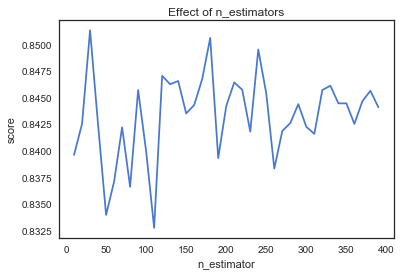

In [95]:
#Plot of the threshold trees required for random forest
estimators = np.arange(10, 400, 10)
scores = []
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(train_num.iloc[:,0:10],train_num.iloc[:,10])
    scores.append(rf_model.score(test_num.iloc[:,0:10],test_num.iloc[:,10]))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

# Re-Modelling by imputing outliers by categories' means 

##  Performing Random forest Model on new dataset

In [96]:
#Detecting outliers and replacing with NAs

q75_w, q25_w = np.percentile(df['windspeed'], [75 ,25])


iqr_w = q75_w - q25_w


minimum_w = q25_w - (iqr_w*1.5)
maximum_w = q75_w + (iqr_w*1.5)

q75_h, q25_h = np.percentile(df['hum'], [75 ,25])


iqr_h = q75_h - q25_h


minimum_h = q25_h - (iqr_h*1.5)
maximum_h = q75_h + (iqr_h*1.5)

q75_cnt, q25_cnt = np.percentile(df['casual'], [75 ,25])


iqr_cnt = q75_cnt - q25_cnt


minimum_cnt = q25_cnt - (iqr_cnt*1.5)
maximum_cnt = q75_cnt + (iqr_cnt*1.5)



df.loc[df['hum'] < minimum_h, 'hum'] = np.nan
df.loc[df['hum'] > maximum_h, 'hum'] = np.nan
df.loc[df['windspeed'] < minimum_w, 'windspeed'] = np.nan
df.loc[df['windspeed'] > maximum_w, 'windspeed'] = np.nan
df.loc[df['casual'] < minimum_cnt, 'casual'] = np.nan
df.loc[df['casual'] > maximum_cnt, 'casual'] = np.nan

In [97]:
#Imputing means of weekday category to cnt
df.loc[(df['weekday'] == 6) & pd.isnull(df['casual']) , 'cnt'] = 5732 
df.loc[(df['weekday'] == 0) & pd.isnull(df['casual']) , 'cnt'] = 5036  

In [98]:
df=df.drop('casual', axis=1)

In [99]:
#Dropping rest of the NAs from hum and windspeed as they are randomly distributed
df=df.dropna()

In [100]:
df=df.drop(['atemp','registered'], 1)

In [101]:
random.seed(20)

train_num_imp, test_num_imp = train_test_split(df, test_size=0.2)

In [102]:
rf_model_imp = RandomForestRegressor(n_estimators = 51).fit(train_num_imp.iloc[:,0:10], train_num_imp.iloc[:,10])

In [103]:
rf_predictions_imp = rf_model_imp.predict(test_num_imp.iloc[:,0:10])

In [104]:
MAPE(test_num_imp.iloc[:,10],rf_predictions_imp)

17.14598062423635

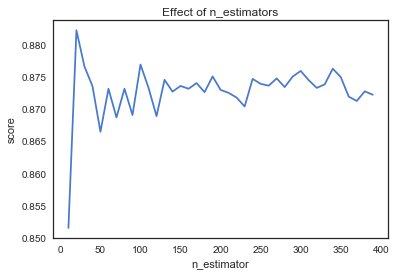

In [117]:
##Plot of the threshold trees required for re-modelled random forest
estimators = np.arange(10, 400, 10)
scores = []
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(train_num_imp.iloc[:,0:10],train_num_imp.iloc[:,10])
    scores.append(rf_model.score(test_num_imp.iloc[:,0:10],test_num_imp.iloc[:,10]))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)